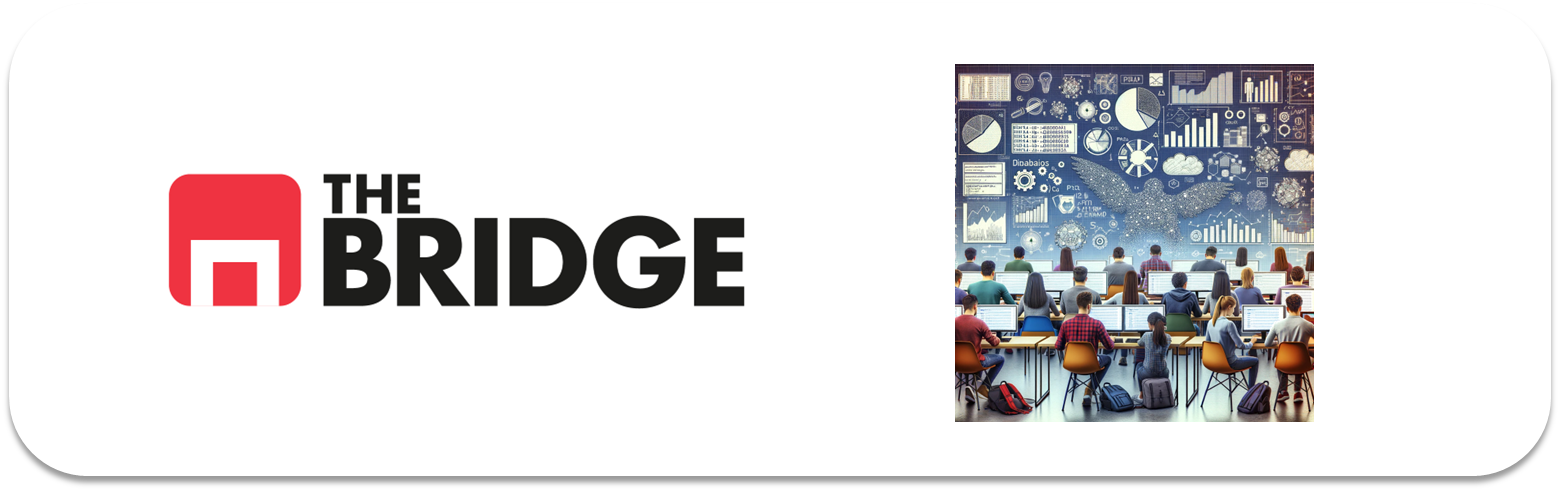

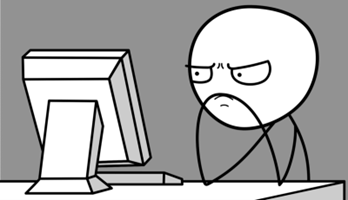

Para ejercitarte y afianzar lo aprendido sobre **Regularización**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

En estos ejercicios vamos a repasar la regularización sobre regresión lineal obteniendo primero un modelo de regresión lineal para predecir el precio de un coche y luego los equivalentes con penalizaciones L2 (Ridge), L1 (Lasso) y con la combinación de ambas (ElasticNet)

### Ejercicio 1

Carga el dataset de partida ("./data/CarPrice_Assignment.csv") en el que tenemos diferentes modelos de coches con sus características y el precio de estos. Échale un vistazo

In [5]:
data = pd.read_csv("./data/CarPrice_Assignment.csv")
data.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
117,118,0,peugeot 604sl,gas,turbo,four,sedan,rwd,front,108.0,...,134,mpfi,3.61,3.21,7.0,142,5600,18,24,18150.0
65,66,0,mazda glc,gas,std,four,sedan,rwd,front,104.9,...,140,mpfi,3.76,3.16,8.0,120,5000,19,27,18280.0
156,157,0,toyota mark ii,gas,std,four,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,30,37,6938.0
142,143,0,subaru brz,gas,std,four,sedan,fwd,front,97.2,...,108,2bbl,3.62,2.64,9.5,82,4400,28,33,7775.0
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.0


### Ejercicio 2

Identifica la variable target y asignala a una variable de nombre `target`, luego elimina de forma permanente el campo "car_ID"

In [7]:
target = data["price"]
features = data.drop(columns=["car_ID", "price"])

### Ejercicio 3

Haz un split del dataset en train y test al 80/20 empleando la función de sklearn que ya conoces

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Ejercicio 4

Aunque vamos a emplear todas las variabes numéricas del dataset como predictores o features, obten la correlación de todas ellas con el target y escoge los que creas que son tus tres mejores predictores. Crea una lista con los nombres de las variables numéricas y llámalo `features_num`

In [15]:
corr_matrix = pd.concat([X_train,y_train], axis=1).corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price               1.000000
enginesize          0.866433
curbweight          0.824212
horsepower          0.810986
carwidth            0.744310
carlength           0.652071
boreratio           0.546099
wheelbase           0.506118
carheight           0.044458
compressionratio    0.035218
stroke              0.023941
symboling          -0.005183
peakrpm            -0.070017
citympg            -0.711245
highwaympg         -0.713503
Name: price, dtype: float64

In [17]:
features_num=["wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg","symboling"]

<Axes: >

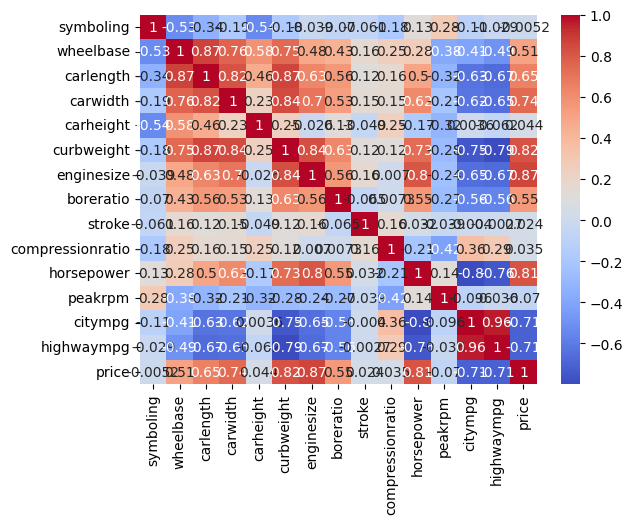

In [16]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

### Ejercicio 5

Completa el siguiente código que tiene como objetivo generar un modelo de regresión lineal utilizando todos los valores de las variables (salvo la target):

In [20]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

target = "price"

# Separación x e y
X_train = train_set.drop(columns= [target])
y_train = train_set[target]

X_test = test_set.drop(columns = [target])
y_test = test_set[target]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train[features_num]), columns= features_num)
X_test = pd.DataFrame(scaler.transform(X_test[features_num]), columns= features_num)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

### Ejercicio 6

Obten el MAE,RMSE y $R^2$ para las predicciones sobre train (X_train) y para las predicciones sobre test (X_test). ¿Podemos esperar una buena generalización?

In [24]:
from sklearn import metrics

# Error de entrenamiento en el conjunto train
y_pred_train = lin_reg.predict(X_train) # predicciones sobre el conjunto de entrenamiento
print("MAE entrenamiento: ", metrics.mean_absolute_error(y_train, y_pred_train))
print("RMSE entrenamiento: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("R2 entrenamiento: ", metrics.r2_score(y_train, y_pred_train))

# Error de test sobre el conjunto test
y_pred_test = lin_reg.predict(X_test) # predicciones sobre el conjunto de test
print("MAE test: ", metrics.mean_absolute_error(y_test, y_pred_test))
print("RMSE test: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print("R2 test: ", metrics.r2_score(y_test, y_pred_test))


MAE entrenamiento:  2186.495238619768
RMSE entrenamiento:  2911.593458582073
R2 entrenamiento:  0.8578523829898764
MAE test:  2680.429983159423
RMSE test:  3789.199007303314
R2 test:  0.8181239192410048


Hay poca varianza entre el error de entrenamiento y test por lo que es esperable una buena generalización

### Ejercicio 7
 
Vamos a regularizar, crea un regresor Ridge con alpha inicial a 10 y entrenalo con el X_train. Obten MAE, RMSE y $R^2$ considerando las predicciones sobre el mismo X_train

In [25]:
from sklearn.linear_model import Ridge # importamos el modelo Ridge
 
lr_Ridge = Ridge(alpha=10) # definimos el modelo Ridge con un alpha=10

lr_Ridge.fit(X_train, y_train) # entrenamos el modelo Ridge

# Error de entrenamiento en el conjunto train
y_pred_train = lr_Ridge.predict(X_train) # predicciones sobre el conjunto de entrenamiento
print("MAE entrenamiento: ", metrics.mean_absolute_error(y_train, y_pred_train))
print("RMSE entrenamiento: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("R2 entrenamiento: ", metrics.r2_score(y_train, y_pred_train))

MAE entrenamiento:  2158.243656697338
RMSE entrenamiento:  2977.6036200619096
R2 entrenamiento:  0.8513339231129411


### Ejercicio 8

Evalúalo contra el X_test y obten MAE,RMSE y $R^2$. ¿Es mejor generalizado que la regresión lineal sin regularizar?

In [26]:
# Error de test sobre el conjunto test
y_pred_test = lr_Ridge.predict(X_test) # predicciones sobre el conjunto de test
print("MAE test: ", metrics.mean_absolute_error(y_test, y_pred_test))
print("RMSE test: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print("R2 test: ", metrics.r2_score(y_test, y_pred_test))


MAE test:  2683.5502270180987
RMSE test:  3757.52016265613
R2 test:  0.8211522846766279


### Ejercicio 9
 
Ahora crea un regresor Lasso con alpha inicial a 125 y entrenalo con el X_train. Obten MAE, RMSE y $R^2$ considerando las predicciones sobre el mismo X_train.

In [27]:
from sklearn.linear_model import Lasso # importamos el modelo Lasso

lr_lasso = Lasso(alpha=125) # definimos el modelo Lasso con un alpha=125

lr_lasso.fit(X_train, y_train) # entrenamos el modelo Lasso

# Error de entrenamiento en el conjunto train
y_pred_train = lr_lasso.predict(X_train) # predicciones sobre el conjunto de entrenamiento
print("MAE entrenamiento: ", metrics.mean_absolute_error(y_train, y_pred_train))
print("RMSE entrenamiento: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("R2 entrenamiento: ", metrics.r2_score(y_train, y_pred_train))


MAE entrenamiento:  2160.7678366914583
RMSE entrenamiento:  2979.4564518723737
R2 entrenamiento:  0.8511488488231629


### Ejercicio 10

Evalúalo contra el X_test y obten MAE,RMSE y $R^2$. ¿Es mejor generalizado que los otros dos modelos?

In [28]:
# Error de test sobre el conjunto test
y_pred_test = lr_lasso.predict(X_test) # predicciones sobre el conjunto de test
print("MAE test: ", metrics.mean_absolute_error(y_test, y_pred_test))
print("RMSE test: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print("R2 test: ", metrics.r2_score(y_test, y_pred_test))

MAE test:  2720.007728774525
RMSE test:  3767.749131273844
R2 test:  0.8201772172479649


### Ejercicio 11

Repite los ejercicios 9 y 10 con un regresos ElasticNet con alpha 0.2 y l1_ratio a 0.7. ¿Es mejor generalizando que el resto?

In [29]:
# Importamos el modelo ElasticNet
from sklearn.linear_model import ElasticNet

lr_elastic = ElasticNet(alpha=0.2, l1_ratio=0.7) # definimos el modelo ElasticNet con un alpha=0.2 y l1_ratio=0.7

lr_elastic.fit(X_train, y_train) # entrenamos el modelo ElasticNet

# Error de entrenamiento en el conjunto train
y_pred_train = lr_elastic.predict(X_train) # predicciones sobre el conjunto de entrenamiento
print("MAE entrenamiento: ", metrics.mean_absolute_error(y_train, y_pred_train))
print("RMSE entrenamiento: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("R2 entrenamiento: ", metrics.r2_score(y_train, y_pred_train))

# Error de test sobre el conjunto test
y_pred_test = lr_elastic.predict(X_test) # predicciones sobre el conjunto de test
print("MAE test: ", metrics.mean_absolute_error(y_test, y_pred_test))
print("RMSE test: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print("R2 test: ", metrics.r2_score(y_test, y_pred_test))

MAE entrenamiento:  2158.1465941649235
RMSE entrenamiento:  2976.650982082365
R2 entrenamiento:  0.8514290346951597
MAE test:  2683.009213454536
RMSE test:  3756.448701136147
R2 test:  0.8212542674285856


### Ejercicio 12

¿Qué podrías hacer para mejorar los regresores regularizados?

* Incrementar la penalización sobre la función de coste con el hiperparámetro alpha

### EXTRA:

Utiliza la función siguiente para pintar la importancia de los coeficientes en cada uno de los cuatro modelos y observa el efecto de las penalizaciones de cada una de las regularizaciones:

In [30]:
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_, index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef

Text(0.5, 1.0, 'Modelo ElasticNet')

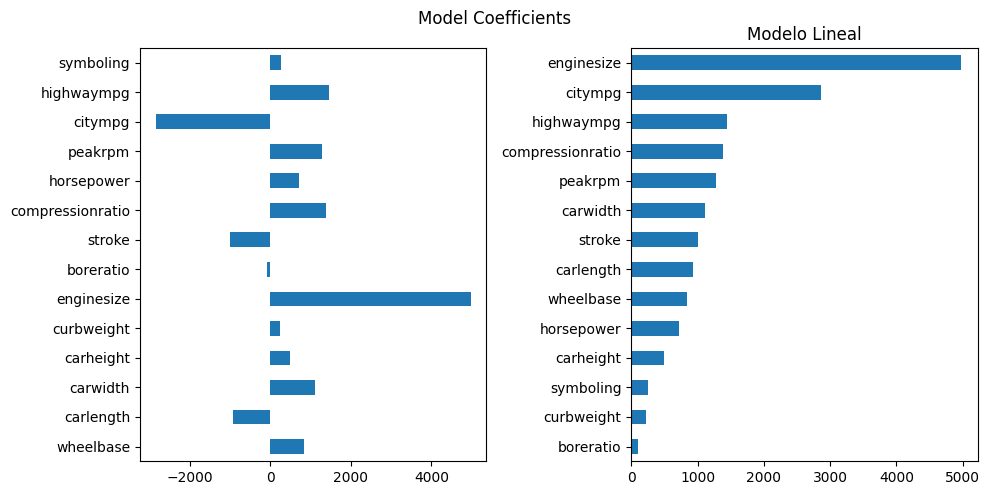

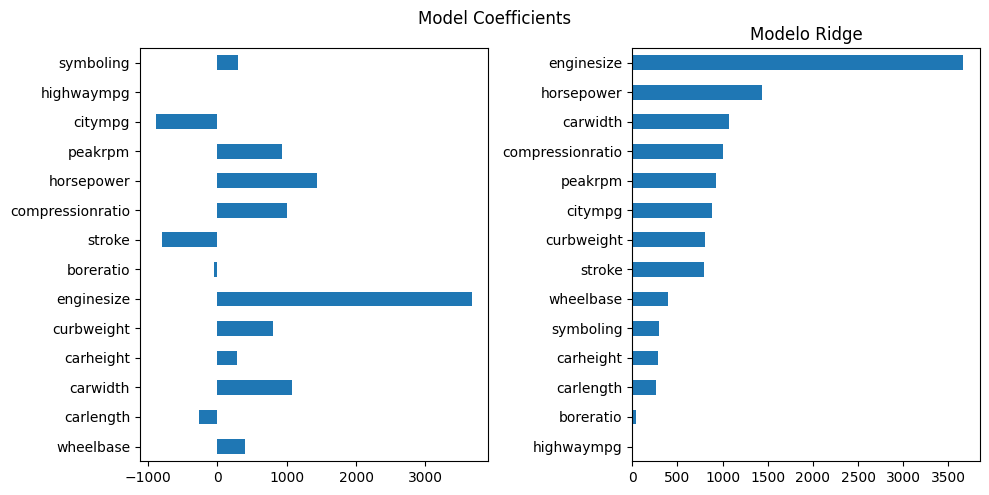

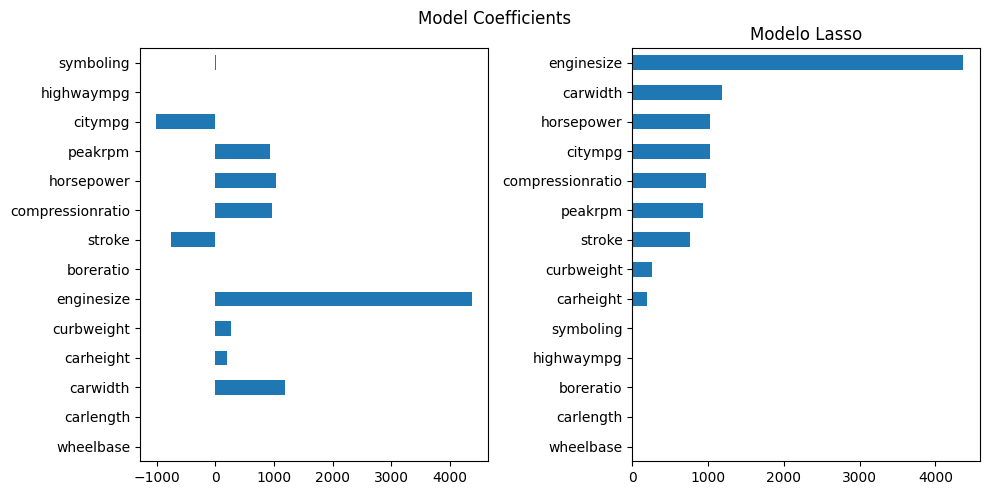

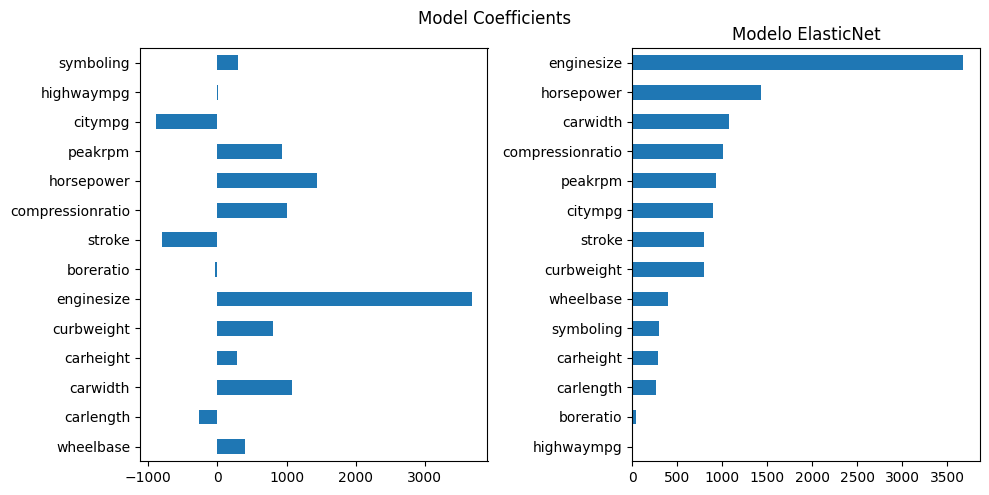

In [35]:
# Mostramos los coeficientes del modelo lineal
show_coefs(lin_reg)
plt.title("Modelo Lineal")

# Mostramos los coeficientes del modelo Ridge
show_coefs(lr_Ridge)
plt.title("Modelo Ridge")

# Mostramos los coeficientes del modelo Lasso
show_coefs(lr_lasso)
plt.title("Modelo Lasso")

# Mostramos los coeficientes del modelo ElasticNet
show_coefs(lr_elastic)
plt.title("Modelo ElasticNet")


In [ ]:
p